# Performance of Python with Numba
### Exemplary Problem: Numerical solution of logistic differential equation 
$\frac{\partial U(t)}{\partial t} = U(t)(1-U(t))$ 
 
Strategy: 
Transform into discrete sequence and calculate the single steps for sufficient small time steps $\Delta t$.

$U(t+\Delta t) =U(t)+ U(t)(1-U(t))\Delta t $

First step: Import neccesary packages

In [8]:
import numpy as np
from time import time
import matplotlib.pyplot as plt
from numba import njit

Second step: Define function for discretisation with number of steps N as input argument. Add @njit() macro to just in time compile the function with numba. 

In [5]:
@njit()
def python_logistic(N):
    # Parameters
    T = 25
    u0 = 1e-5
    # Right hand side function
    f = lambda u: u*(1-u)
    # Discretization
    t = np.linspace(0,T,N)
    dt = t[1]-t[0]
    # Time stepping
    u = np.empty(len(t))
    u[0] = u0
    for k in range(len(t)-1):
        u[k+1] = u[k] + dt*f(u[k])
    return(t,u)

Third step: Visualize the problem, so see if everthing works as planned  

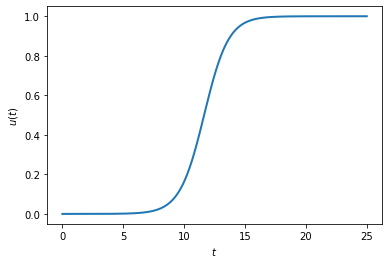

In [6]:
T,U = python_logistic(1000)
plt.plot(T,U,lw=2)
plt.xlabel('$t$')
plt.ylabel('$u(t)$')
plt.show()

Fourth step: Benchmark the function 

In [9]:
%timeit python_logistic(1000)

4.43 µs ± 4.56 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Fifth step: Realize that Numba can make Python fast 